# Neural Networks for Data Science Applications (2019/2020)
## Final exam

* **Student(s)**: Katsiaryna Zavadskaya (1847985).
* **Reference paper / topic**: DeVries, T., & Taylor, G. W. (2017). Improved regularization of convolutional neural networks with cutout. arXiv preprint arXiv:1708.04552.
* **Paper link**: https://arxiv.org/pdf/1708.04552.pdf


## Part 1: Report


**Paper objective:**

The paper is aiming to solve the problem of the neural networks poor generalization. The generalization of the model may be compromised by overfitting, which in it's turn can be solved by regularization.
The authors propose a new regularization technique — cutout.
Cutout is an application of zero mask of a certain size to a random place of a training image. The cutout can be seen as a dropout applied to the input layer of a Convolutional neural network. It is applied randomly and masks not single pixels, but contiguous areas of the input images. 
The authors experiment with modern architectures and popular datasets to show the efficiency of the created regularization method.

**Details about re-implementation:**

During the re-implementation, I focused on two architectures: ResNet18 and WideResNet28-10 and two datasets: Cifar-10 and Cifar-100.

Both datasets consist of 32x32 pixels color images, where the number of samples is 60.000, and each of the datasets is split into train and test sets with 50.000 and 10.000 examples, respectively.

**Data normalization:**

The authors normalize both datasets using per-channel mean
and standard deviation, however I perform only pixel-wise mean subtraction, since in my experiments mean-std normalization was bringing lower accuracy.

**Data augmentation:**

In accordance with the paper, I applied the standard for these datasets data augmentation procedure:
+ zero-padding with 4 pixels, which results in 40 x 40 images
+ random crop back to 32 x 32 size
+ random horizontal mirroring

**Models:**

The authors evaluate cutout effect on two architectures:
+ [ResNet18](https://arxiv.org/pdf/1603.05027.pdf) - Residual network 
+ [WideResNet-28-10](https://arxiv.org/pdf/1605.07146.pdf) - Wide residual network with a depth of 28 and a widening factor of 10, and p = 0.3 dropout in the convolutional layers

**Training procedure:**

The original paper's approach hasn't led me to the optimum result, and after multiple experiments with different optimizers, Nesterov momentum parameters and schedules for the learning rate, performed on ResNet18 for Cifar-10, I stopped on the different training path.
The authors use the same training procedure for the both architectures, however in my implementation when it comes to WideResNet-28-10, I trained it only for 50 epochs due to the long running time. It is not showing the best possible accuracy, but, unfortunately, 200 epochs in this case take about 10 hours.

The detail of the training approach can be seen the table below:

<table style="border-collapse:collapse;border-color:#ccc;border-spacing:0;border:none;margin:0px auto" class="tg"><thead><tr><th style="background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:0px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Architecture</th><th style="background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:0px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Epochs</th><th style="background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:0px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Optimizer</th><th style="background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:0px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Learning rate [epochs] : [lr]</th><th style="background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:0px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">Training time</th></tr></thead><tbody><tr><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:0px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Cutout for both</td><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:0px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">200</td><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:0px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">SGD + Nesterov 0.9</td><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:0px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">[1-60, -120, -160, -200] : [1e-1, 2e-2, 4e-3, 8e-4]</td><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:0px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal"></td></tr><tr><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:0px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">WideResNet-28-10</td><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:0px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">50</td><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:0px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Adam</td><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:0px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">[1-20, -30, -40, -45, -50] : [1e-3, 1e-4, 1e-5, 1e-6, 5e-7]</td><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:0px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">2 h 30 mins</td></tr><tr><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:0px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">ResNet18</td><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:0px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">200</td><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:0px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Adam</td><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:0px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">[1-60, -120, -160, -180, -200] : [1e-3, 1e-4, 1e-5, 1e-6, 5e-7]</td><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:0px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">1 h 20 mins</td></tr></tbody></table>

**Cutout implementation:**

The authors suggest to implement cutout as an application of a square-shaped zero-mask with a given size. The mask should be applied to a random location of each image at every training epoch. The authors claim that the area of the cutout patch is more important than the shape, so there is no difference if the mask is square or rectangular. The other crucial detail is that the center of the patch can be wherever withing the image, so the network simetimes receive images with a part of the mask.

My cutout implementation supports not only placement of the square mask of a certain size centered on a random pair of coordinates, but also variable probability of applying the cutout mask. Even though in the current setting of model-dataset the mask should be present on each of the images, I beleive that for the other combinations, different chance of reciving augmented image could be more beneficial.

The result of application of the cutout on the Cifar-10 with probability parameter p=1.0(left) and p=0.5(right) can be seen on the image below:


![image.png](https://drive.google.com/uc?id=1Ssvnribkga-RhK7KPYHXkJQYi55NI90z)


The other important point is the size of the cutout. The authors performed the grid-search and found that the value which maximizes accuracy for Cifar-10 and Cifar-100 are 16 and 8 pixels, respectively. From the results I got for the Cifar-10 dataset on ResNet18, I conclude that 16 is the optimal size of the cutout mask.

![image.png](https://drive.google.com/uc?id=1nmRSnkL0Zle-bI9nbcEIMkFUVhOs0eb7)

Finally, the aim of the paper is to show that cutout as a regularization technique increases generalization of the models and archieves state-of-the-art results. The table below shows the accuracy I received during the experiments. Symbol '+' means with applied data augmentation. As it is seen from the data in both cases Cifar-10 and Cifar-100 for both models, baseline models are the least accurate, and cutout regularization is beneficial on top of the baseline model and also on top of data augmented model.




Method | C10 | C10+ | C100 | C100+
--- | --- | --- | --- | ---
ResNet18 | 0.835 | 0.915 | 0.478 | 0.663
ResNet18 + Cutout | 0.869 | 0.927 | 0.533 | 0.673
WideResNet 28-10 | 0.881 | 0.915 | 0.618 | 0.697
WideResNet 28-10 + Cutout | 0.896 | 0.923 | 0.632 | 0.7


## Part 2: External libraries


In [ ]:
import tensorflow
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10, cifar100
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import time


# MODELS AND UTILS
from resnet18 import resnet
from train_utils_resnet import lr_schedule_rn, hms_string, get_random_cutout
from keras.utils import plot_model
from train_utils_wrn import lr_schedule_wrn
from wideresnet import create_wide_residual_network

## Part 3: Code


In [ ]:
CIFAR10 = True
RESNET_MODEL = True # to use wideresnet False
# put path to folder where the model is going to be saved
MODEL_PATH = '/content/drive/MyDrive/NN_EXAM/saved_models/model_name'

if CIFAR10:
    # Load the CIFAR10 data.
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
else:
    # Load the CIFAR100 data.
    (x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train_mean = np.mean(x_train, axis=0)
x_train -= x_train_mean
x_test -= x_train_mean

# Print number of training and testing samples
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices
y_train = tensorflow.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = tensorflow.keras.utils.to_categorical(y_test, NUM_CLASSES)

NUM_CLASSES = np.unique(y_train).shape[0] # 10 or 100

In [ ]:
# TRAINING
# Training parameters
EPOCHS = 200
BATCH_SIZE = 128
USE_AUGMENTATION = True
COLORS = x_train.shape[3] # channels
CUTOUT_SIZE = 16 # 8 for cifar100
CUTOUT_PROB = 1.0


# Create the neural network
if RESNET_MODEL:
    DEPTH = COLORS * 6 + 2 # Computed depth from supplied model parameter n
    model = resnet(input_shape=x_train.shape[1:], depth=DEPTH,
                   num_classes=NUM_CLASSES)
    lr_schedule = lr_schedule_rn
else:
    model = create_wide_residual_network(x_train.shape[1:],
                                         nb_classes=NUM_CLASSES, N=4, k=10,
                                         dropout=0.3)
    lr_schedule = lr_schedule_wrn
    EPOCHS = 50

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=lr_schedule(0)),
              metrics=['accuracy'])
model.summary()
if RESNET_MODEL:
    plot_model(model, "ResNet18.png", show_shapes=True)
else:
    plot_model(model, "WideResNet28-10.png", show_shapes=True)

# Training process
start_time = time.time()
# Prepare callbacks for model saving and for learning rate adjustment
lr_scheduler = LearningRateScheduler(lr_schedule)
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)
callbacks = [lr_reducer, lr_scheduler]

# Run training, with or without data augmentation.
if not USE_AUGMENTATION:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                        validation_data=(x_test, y_test), shuffle=True, 
                        callbacks=callbacks)
else:
    print('Using real-time data augmentation.')
    datagen = ImageDataGenerator(
        width_shift_range=4,
        height_shift_range=4,
        horizontal_flip=True,
        # cutout function application
        preprocessing_function=get_random_cutout(p=CUTOUT_PROB, size=CUTOUT_SIZE))
    datagen.fit(x_train)

    history = model.fit(datagen.flow(x_train, y_train, 
                        batch_size=BATCH_SIZE),
                        validation_data=(x_test, y_test),
                        epochs=EPOCHS, verbose=1, workers=1,
                        callbacks=callbacks, 
                        use_multiprocessing=False)
    
elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))
model.save(MODEL_PATH)

## Part 4 - Experimental evaluation

The experiments were held in order to show that the regularization techniques are increasing performance of the model and decreasing overfitting. The accuracy results are presented in the final table of Part 1. 

Here I will show the evaluation of the models on the two datasets and comparison graphs. The accuracy image duplicates the result of the execution of the next code cell.

![image.png](https://drive.google.com/uc?id=1-7IcCVZD2YBVQVtN08CgH2gUOQfLClHw)

Finally, by looking at the loss, we can see that the level of overfitting significantly decreased by applying the data augmentation and cutout regularization techniques.

![image.png](https://drive.google.com/uc?id=1-MqLyeLE1h7XMzYRz_DXcyKZGy7G22q0)


313/313 [==============================] - 2s 5ms/step - loss: 0.3556 - accuracy: 0.9269


<Figure size 640x480 with 0 Axes>

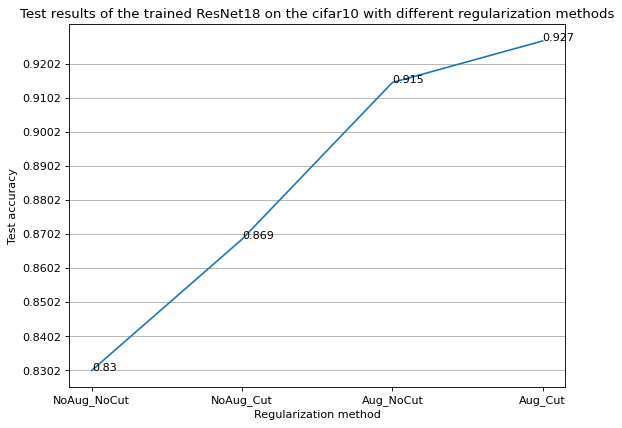

313/313 [==============================] - 14s 40ms/step - loss: 0.2840 - accuracy: 0.9234


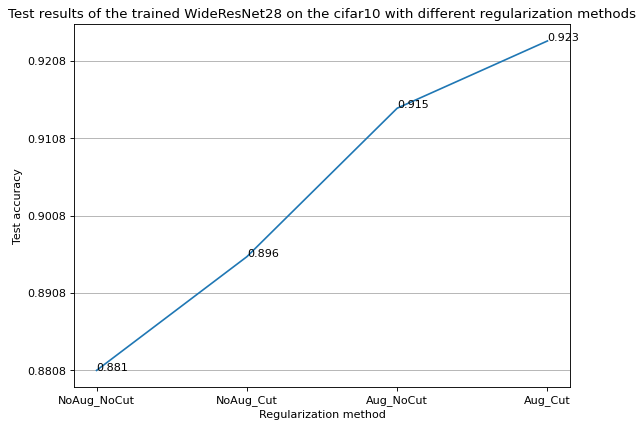

313/313 [==============================] - 2s 5ms/step - loss: 1.4835 - accuracy: 0.6731


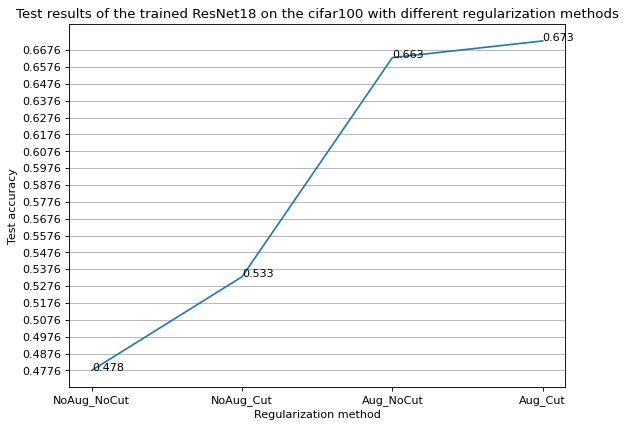

313/313 [==============================] - 13s 40ms/step - loss: 1.5344 - accuracy: 0.6995


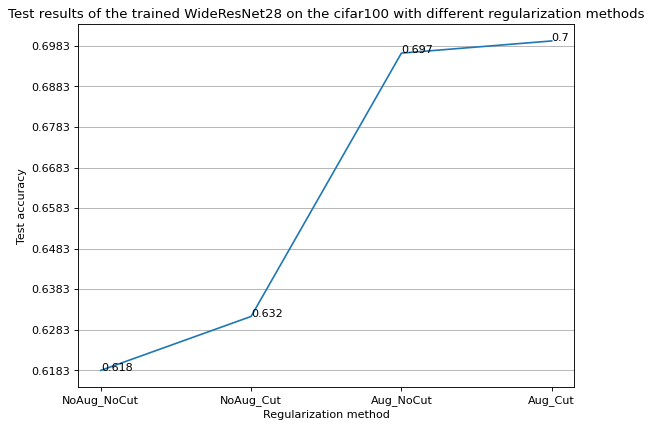

In [ ]:
main_path = '/content/drive/MyDrive/NN_EXAM/saved_models/'
model_name = ['ResNet18','WideResNet28']
dataset = ['cifar10','cifar100']
versions = ['NoAug_NoCut', 'NoAug_Cut', 'Aug_NoCut', 'Aug_Cut']


for d in dataset:
    if d == 'cifar10':
        (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    elif d == 'cifar100':
        (x_train, y_train), (x_test, y_test) = cifar100.load_data()
    NUM_CLASSES = np.unique(y_train).shape[0] # 10 or 100
    # Normalize data.
    x_train = x_train.astype('float32') / 255
    x_test = x_test.astype('float32') / 255
    x_train_mean = np.mean(x_train, axis=0)
    x_test -= x_train_mean
    y_test = tensorflow.keras.utils.to_categorical(y_test, NUM_CLASSES)
    for m in model_name:
        acc = []
        for v in versions:
            reconstructed_model = tensorflow.keras.models.load_model(
            main_path +  m + '_' + d + '_' + v)
            scores = reconstructed_model.evaluate(x_test, y_test,verbose=1)
            acc.append(scores[1])

        # plot comparison graph
        figure(num=None, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')   
        acc = np.array(acc)
        plt.yticks(np.arange(acc.min(), acc.max()+0.001,0.01))
        plt.plot(versions, acc)
        plt.grid(axis='y', linestyle='-')
        plt.title('Test results of the trained '+ m + ' on the ' 
                + d + ' with different regularization methods')
        plt.ylabel('Test accuracy')
        plt.xlabel('Regularization method')
        for a,b in zip(versions, acc): 
            plt.text(a, b, str(np.round(b,3)))
        plt.show()